Proviamo con l'approccio basato sul pattern

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from wfdb import processing
from sympy import fwht
import matplotlib.pyplot as plt
import wfdb
list_of_sequences = list()
list_of_person = set()
db_name = "ecgiddb/"

f = open(db_name + "RECORDS", "r")
for y in f.readlines():
    list_of_person.add(y.split("/")[0])
list_of_person = list(list_of_person)

end_sample=10000
list_of_person_peak = list()
good_person = list()
for person in list_of_person[:100]:
    try:
        record = wfdb.rdrecord(db_name + person + "/rec_1", sampfrom=0, sampto=end_sample, channels=[0])
        good_person.append(person)
    except FileNotFoundError:
        continue

    # Use the GQRS algorithm to detect QRS locations in the first channel
    qrs_inds = processing.qrs.gqrs_detect(sig=record.p_signal[:,0], fs=record.fs)

    if len(qrs_inds) < 1:
        #list_of_person.remove(person)
        continue
    # Correct the peaks shifting them to local maxima
    min_bpm = 20
    max_bpm = 230
    # min_gap = record.fs * 60 / min_bpm
    # Use the maximum possible bpm as the search radius
    search_radius = int(record.fs * 60 / max_bpm)
    corrected_peak_inds = processing.peaks.correct_peaks(record.p_signal[:,0],
                                                     peak_inds=qrs_inds,
                                                     search_radius=search_radius,
                                                     smooth_window_size=150)
    # Order the peaks index
    corrected_peak_inds = sorted(corrected_peak_inds)

    sequences_numpy = list()
    for r in corrected_peak_inds:
        if r<150 or r>9800:
            continue
        current_seq = record.p_signal[r-80:r+80]
        transform = current_seq.ravel().tolist()
        sequences_numpy.append(np.array(transform)[:])

    try:
        sequences = np.median(sequences_numpy, axis=0)

    except ValueError:
        for u in sequences_numpy:
            print(len(u))

    y = 0
    final_string = list()
    for x in sequences:
        if x > (y + 0):
            final_string.append(0)
        else:
            final_string.append(1)
        y = x
    list_of_sequences.append(final_string)
    sequences = sequences.tolist()
# Let's compute the fractional Hamming Distance for each pair

all_fhd_dataset = pd.DataFrame(columns=["p1i", "p1","p2i", "p2", "dist"])
complex_sum = 0
for i, y in enumerate(list_of_sequences):
    first = np.array(y, dtype=np.float64)
    for j, z in enumerate(list_of_sequences[i+1:]):
        second = np.array(z, dtype=np.float64)
        fhd_ij = np.sum(np.abs(first - second))/len(first) # or second len, it is the same
        complex_sum += fhd_ij
        all_fhd_dataset.loc[len(all_fhd_dataset)] = [i, good_person[i], j + i + 1, good_person[j + i + 1], fhd_ij]

# Let's compute the uniqueness
multiplier = 2/(len(good_person)*(len(good_person)-1))
uniqueness = multiplier * complex_sum

ordered = all_fhd_dataset.sort_values(by=['dist'])
sns.displot(ordered[:], x="dist")
ordered.iloc[0]['dist']
uniqueness

Altrimenti proviamo con la rappresentazione a bit dell'intero stream

1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920
1920


0.4302200374531836

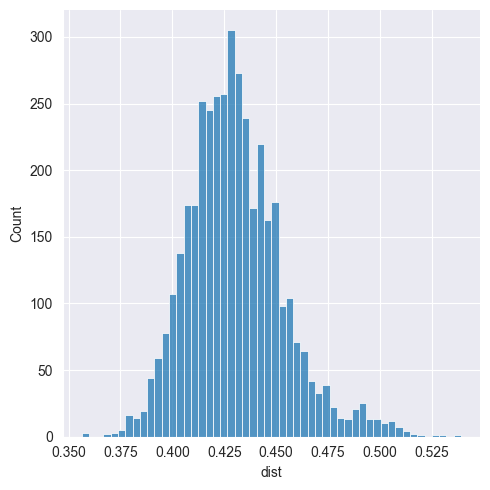

In [10]:
import pandas as pd
import numpy as np
import struct
import seaborn as sns
from wfdb import processing
import random
from sympy import fwht
import wfdb

list_of_sequences = list()
list_of_person = set()
db_name = "ecgiddb/"

f = open(db_name + "RECORDS", "r")
for y in f.readlines():
    list_of_person.add(y.split("/")[0])
list_of_person = list(list_of_person)

end_sample=10000
window_size = 100
list_of_person_peak = list()
good_person = list()
randomlist = random.sample(range(1, 199), 60)
for person in list_of_person[:100]:
    try:
        record = wfdb.rdrecord(db_name + person + "/rec_1", sampfrom=0, sampto=end_sample, channels=[0])
        good_person.append(person)
    except FileNotFoundError:
        continue

    # Use the GQRS algorithm to detect QRS locations in the first channel
    qrs_inds = processing.qrs.gqrs_detect(sig=record.p_signal[:,0], fs=record.fs)

    if len(qrs_inds) < 1:
        #list_of_person.remove(person)
        continue
    # Correct the peaks shifting them to local maxima
    min_bpm = 20
    max_bpm = 230
    # min_gap = record.fs * 60 / min_bpm
    # Use the maximum possible bpm as the search radius
    search_radius = int(record.fs * 60 / max_bpm)
    corrected_peak_inds = processing.peaks.correct_peaks(record.p_signal[:,0],
                                                     peak_inds=qrs_inds,
                                                     search_radius=search_radius,
                                                     smooth_window_size=150)
    # Order the peaks index
    corrected_peak_inds = sorted(corrected_peak_inds)
    sequences_numpy = list()
    for r in corrected_peak_inds:
        if r<window_size or r>end_sample - window_size:
            continue
        current_seq = record.p_signal[r-window_size:r+window_size]
        #transform = fwht(current_seq.ravel().tolist())
        #sequences_numpy.append(np.array(transform)[:])
        sequences_numpy.append(current_seq)

    try:

        sequences = np.median(sequences_numpy, axis=0)
        sequences = fwht(sequences.ravel().tolist())
        sequences = np.array(sequences)
    except ValueError:
        for u in sequences_numpy:
            print(len(u))



    y = 0
    final_string = list()
    for x in sequences[randomlist]:
        final_string.append(''.join('{:0>8b}'.format(c) for c in struct.pack('!f', x)))
    final_string = ''.join(final_string)
    bin_array = list()
    for y in final_string:
        bin_array.append(y)
    list_of_sequences.append(bin_array)
    sequences = sequences.tolist()
# Let's compute the fractional Hamming Distance for each pair
all_fhd_dataset = pd.DataFrame(columns=["p1i", "p1","p2i", "p2", "dist"])
complex_sum = 0
for i, y in enumerate(list_of_sequences):
    first = np.array(y, dtype=np.float64)
    print(len(first))
    for j, z in enumerate(list_of_sequences[i+1:]):
        second = np.array(z, dtype=np.float64)
        fhd_ij = np.sum(np.abs(first - second))/len(first) # or second len, it is the same
        complex_sum += fhd_ij
        all_fhd_dataset.loc[len(all_fhd_dataset)] = [i, good_person[i], j + i + 1, good_person[j + i + 1], fhd_ij]

# Let's compute the uniqueness
multiplier = 2/(len(good_person)*(len(good_person)-1))
uniqueness = multiplier * complex_sum

ordered = all_fhd_dataset.sort_values(by=['dist'])
sns.displot(ordered[:], x="dist")
uniqueness

In [ ]:

list_of_sequences = list()
f = open(db_name + "RECORDS", "r")
person_name = "Person_01"
list_of_records = list()
randomlist = random.sample(range(1, 199), 60)

for y in f.readlines():
    if y.split("/")[0] != person_name:
        continue
    list_of_records.append(y.split("/")[1].strip())
list_of_records = list(list_of_records)
end_sample=10000
good_record = list()
print(list_of_records)
# list_of_records = ['rec_1', 'rec_12']
for person in list_of_records:
    try:
        record = wfdb.rdrecord(db_name + person_name + "/" + person, sampfrom=0, sampto=end_sample, channels=[1])
        good_record.append(person)
    except FileNotFoundError:
        continue

    # Use the GQRS algorithm to detect QRS locations in the first channel
    qrs_inds = processing.qrs.gqrs_detect(sig=record.p_signal[:,0], fs=record.fs)

    if len(qrs_inds) < 1:
        continue
    # Correct the peaks shifting them to local maxima
    min_bpm = 20
    max_bpm = 230
    # min_gap = record.fs * 60 / min_bpm
    # Use the maximum possible bpm as the search radius
    search_radius = int(record.fs * 60 / max_bpm)
    corrected_peak_inds = processing.peaks.correct_peaks(record.p_signal[:,0],
                                                     peak_inds=qrs_inds,
                                                     search_radius=search_radius,
                                                     smooth_window_size=150)

    # Order the peaks index
    corrected_peak_inds = sorted(corrected_peak_inds)
    sequences_numpy = list()
    for r in corrected_peak_inds:
        if r<window_size or r>end_sample - window_size:
            continue
        current_seq = record.p_signal[r-window_size:r+window_size]
        #transform = fwht(current_seq.ravel().tolist())
        #sequences_numpy.append(np.array(transform)[:])
        sequences_numpy.append(current_seq)

    try:

        sequences = np.median(sequences_numpy, axis=0)
        sequences = fwht(sequences.ravel().tolist())
        sequences = np.array(sequences)
    except ValueError:
        for u in sequences_numpy:
            print(len(u))

    y = 0
    final_string = list()
    for x in sequences[randomlist]:
        final_string.append(''.join('{:0>8b}'.format(c) for c in struct.pack('!f', x)))
    final_string = ''.join(final_string)
    bin_array = list()
    for y in final_string:
        bin_array.append(y)
    list_of_sequences.append(bin_array)
    sequences = sequences.tolist()

all_fhd_dataset = pd.DataFrame(columns=["p1i", "p1","p2i", "p2", "dist"])
complex_sum = 0
#for i, y in enumerate(list_of_sequences):
#    first = np.array(y, dtype=np.float64)
#    for j, z in enumerate(list_of_sequences[i+1:]):
#        second = np.array(z, dtype=np.float64)
#        fhd_ij = np.sum(np.abs(first - second))/len(first) # or second len, it is the same
#        complex_sum += fhd_ij
#        all_fhd_dataset.loc[len(all_fhd_dataset)] = [i, good_person[i], j + i + 1, good_person[j + i + 1], fhd_ij]


first = np.array(list_of_sequences[0], dtype=np.float64)
i=0
for j, z in enumerate(list_of_sequences[1:]):
    second = np.array(z, dtype=np.float64)
    fhd_ij = np.sum(np.abs(first - second))/len(first) # or second len, it is the same
    complex_sum += fhd_ij
    all_fhd_dataset.loc[len(all_fhd_dataset)] = [i, good_person[i], j + i + 1, good_person[j + i + 1], fhd_ij]

print(complex_sum/len(list_of_records))
ordered = all_fhd_dataset.sort_values(by=['dist'])
sns.displot(ordered, x="dist")


In [ ]:
f = open(db_name + "RECORDS", "r")
list_of_person = list()
for y in f.readlines():
    current = y.split("/")[0]
    if current in list_of_person:
        continue
    else:
        list_of_person.append(y.split("/")[0])

list_of_sequences = list()
list_of_records = dict()
f = open(db_name + "RECORDS", "r")

for person in list_of_person:
    list_of_records[person]=list()

for y in f.readlines():
    list_of_records[y.split("/")[0]].append(y.split("/")[1].strip())

end_sample=10000
good_record = dict()
list_reg_allperson = list()
for person_name in list_of_person:
    good_record[person_name] = list()
    for person in list_of_records[person_name]:
        try:
            record = wfdb.rdrecord(db_name + person_name + "/" + person, sampfrom=0, sampto=end_sample, channels=[1])
            good_record[person_name].append(person)
        except FileNotFoundError:
            continue

        # Use the GQRS algorithm to detect QRS locations in the first channel
        qrs_inds = processing.qrs.gqrs_detect(sig=record.p_signal[:,0], fs=record.fs)

        if len(qrs_inds) < 1:
            continue
        # Correct the peaks shifting them to local maxima
        min_bpm = 20
        max_bpm = 230
        # min_gap = record.fs * 60 / min_bpm
        # Use the maximum possible bpm as the search radius
        search_radius = int(record.fs * 60 / max_bpm)
        corrected_peak_inds = processing.peaks.correct_peaks(record.p_signal[:,0],
                                                     peak_inds=qrs_inds,
                                                     search_radius=search_radius,
                                                     smooth_window_size=150)

        # Order the peaks index
        corrected_peak_inds = sorted(corrected_peak_inds)
        sequences_numpy = list()
        for r in corrected_peak_inds:
            if r<window_size or r>end_sample - window_size:
                continue
            current_seq = record.p_signal[r-window_size:r+window_size]
            #transform = fwht(current_seq.ravel().tolist())
            #sequences_numpy.append(np.array(transform)[:])
            sequences_numpy.append(current_seq)

        try:

            sequences = np.median(sequences_numpy, axis=0)
            sequences = fwht(sequences.ravel().tolist())
            sequences = np.array(sequences)
        except ValueError:
            for u in sequences_numpy:
                print(len(u))


        y = 0
        final_string = list()
        for x in sequences[randomlist]:
            final_string.append(''.join('{:0>8b}'.format(c) for c in struct.pack('!f', x)))
        final_string = ''.join(final_string)
        bin_array = list()
        for y in final_string:
            bin_array.append(y)
        list_of_sequences.append(bin_array)
    list_reg_allperson.append(list_of_sequences)
    list_of_sequences = list()

all_fhd_dataset = pd.DataFrame(columns=["p1i", "p1","p2i", "p2", "dist"])
complex_sum = 0
overall_stability = 0
for z in range(0, len(good_record)):
    list_current_person = list_reg_allperson[z]
    first = np.array(list_current_person[0], dtype=np.float64)
    i=0
    complex_sum = 0
    for second_array in list_current_person[1:]:
        second = np.array(second_array, dtype=np.float64)
        fhd_ij = np.sum(np.abs(first - second))/len(first) # or second len, it is the same
        complex_sum += fhd_ij
    stability_i = complex_sum / len(list_current_person)
    overall_stability += stability_i

print(overall_stability/len(good_record))

ordered = all_fhd_dataset.sort_values(by=['dist'])
sns.displot(ordered, x="dist")
